<a href="https://colab.research.google.com/github/JielingChen/Data_Science_Practice_Projects/blob/main/PCA_State_Union.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.corpus import state_union
from nltk import FreqDist

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA

from collections import defaultdict, Counter

from math import log2

* `Axes3D`: Allows you to create three-dimensional plots. It is often  used with matplotlib to add an extra dimension to the plots.
* `FreqDist`: Computes the frequency distribution of items (e.g., words in a text corpus). It is used to find the frequency of each vocabulary item in the text.
* `defaultdict`: a dictionary subclass that calls a factory function to supply missing values. It's often used when you want to ensure that attempting to look up a missing key will not result in a KeyError but will instead return a default value.
* `Counter`: A collection where elements are stored as dictionary keys, and their counts are stored as dictionary values. Useful for tallying the frequency of items in collections.

In [ ]:
# Initialize defaultdict with default value as integer zero
d = defaultdict(int)

# Add key-value pairs
d['apple'] = 1
d['banana'] = 2

# Access existing key
print(d['apple'])
print(d['banana'])

# Access non-existing key; returns default value 0
print(d['orange'])

# The defaultdict object
print(d)

1
2
0
defaultdict(<class 'int'>, {'apple': 1, 'banana': 2, 'orange': 0})


In [ ]:
type(d)

collections.defaultdict

In [ ]:
# Initialize Counter from a list
fruits = ['apple', 'banana', 'apple', 'orange', 'banana', 'apple']
fruit_counter = Counter(fruits)

# Display frequency count
print(fruit_counter)

# Access count of a specific element
print(fruit_counter['apple'])
print(fruit_counter['banana'])

# Access count of a non-existing element; returns 0
print(fruit_counter['mango'])

Counter({'apple': 3, 'banana': 2, 'orange': 1})
3
2
0


In [ ]:
type(fruit_counter)

collections.Counter

In [ ]:
nltk.download('punkt')
nltk.download('state_union')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


True

* `punkt`: contains data required for the Punkt unsupervised machine learning algorithm for tokenizing text. This tokenizer divides a text into a list of sentences or words.
* `state_union`: contains the text of the State of the Union addresses by various Presidents of the United States from 1945 to 2006.

In [ ]:
file_ids = state_union.fileids()
print(file_ids)

['1945-Truman.txt', '1946-Truman.txt', '1947-Truman.txt', '1948-Truman.txt', '1949-Truman.txt', '1950-Truman.txt', '1951-Truman.txt', '1953-Eisenhower.txt', '1954-Eisenhower.txt', '1955-Eisenhower.txt', '1956-Eisenhower.txt', '1957-Eisenhower.txt', '1958-Eisenhower.txt', '1959-Eisenhower.txt', '1960-Eisenhower.txt', '1961-Kennedy.txt', '1962-Kennedy.txt', '1963-Johnson.txt', '1963-Kennedy.txt', '1964-Johnson.txt', '1965-Johnson-1.txt', '1965-Johnson-2.txt', '1966-Johnson.txt', '1967-Johnson.txt', '1968-Johnson.txt', '1969-Johnson.txt', '1970-Nixon.txt', '1971-Nixon.txt', '1972-Nixon.txt', '1973-Nixon.txt', '1974-Nixon.txt', '1975-Ford.txt', '1976-Ford.txt', '1977-Ford.txt', '1978-Carter.txt', '1979-Carter.txt', '1980-Carter.txt', '1981-Reagan.txt', '1982-Reagan.txt', '1983-Reagan.txt', '1984-Reagan.txt', '1985-Reagan.txt', '1986-Reagan.txt', '1987-Reagan.txt', '1988-Reagan.txt', '1989-Bush.txt', '1990-Bush.txt', '1991-Bush-1.txt', '1991-Bush-2.txt', '1992-Bush.txt', '1993-Clinton.txt',

In [ ]:
address_1945 = state_union.raw('1945-Truman.txt')
print(address_1945)

PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS
 
April 16, 1945

Mr. Speaker, Mr. President, Members of the Congress:
It is with a heavy heart that I stand before you, my friends and colleagues, in the Congress of the United States.
Only yesterday, we laid to rest the mortal remains of our beloved President, Franklin Delano Roosevelt. At a time like this, words are inadequate. The most eloquent tribute would be a reverent silence.
Yet, in this decisive hour, when world events are moving so rapidly, our silence might be misunderstood and might give comfort to our enemies.
In His infinite wisdom, Almighty God has seen fit to take from us a great man who loved, and was beloved by, all humanity.
No man could possibly fill the tremendous void left by the passing of that noble soul. No words can ease the aching hearts of untold millions of every race, creed and color. The world knows it has lost a heroic champion of justice and freedom.
Tragic fate has thrust upon

In [ ]:
for file_id in state_union.fileids()[:5]:
    print(f"---- {file_id} ----")
    sample_text = state_union.raw(file_id)[:200]
    print(sample_text)
    print()

---- 1945-Truman.txt ----
PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A JOINT SESSION OF THE CONGRESS
 
April 16, 1945

Mr. Speaker, Mr. President, Members of the Congress:
It is with a heavy heart that I stand before you, my f

---- 1946-Truman.txt ----
PRESIDENT HARRY S. TRUMAN'S MESSAGE TO THE CONGRESS ON THE STATE OF THE UNION AND ON THE BUDGET FOR 1946.
 
January 21, 1946. Dated January 14, 1946 

To the Congress of the United States:
A quarter c

---- 1947-Truman.txt ----
PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO THE CONGRESS ON THE STATE OF THE UNION
 
January 6, 1947

Mr. President, Mr. Speaker, Members of the Congress of the United States: It looks like a good m

---- 1948-Truman.txt ----
PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO THE CONGRESS ON THE STATE OF THE UNION
 
January 7, 1948

Mr. President, Mr. Speaker, and Members of the 80th Congress: 
We are here today to consider the

---- 1949-Truman.txt ----
PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO THE CONGRESS ON 

In [ ]:
def create_term_document_matrix(addresses):
    vocab = set()
    tdm = defaultdict(lambda: [0] * len(addresses)) # a list of zeros with a length equal to the number of addresses
    global_freq = Counter()

    for i, address in enumerate(addresses):
        words = nltk.word_tokenize(address.lower())
        freq_dist = FreqDist(words)
        global_freq.update(freq_dist)

        for word, freq in freq_dist.items():
            vocab.add(word)
            tdm[word][i] = freq

    return tdm, global_freq, list(vocab)

* The `update` method of the `Counter` class is used to add the counts from `freq_dist` to the `global_freq` object. If a word already exists in `global_freq`, its count will be incremented by the count in `freq_dist`. If the word does not exist, it will be added to `global_freq` with its count set to the corresponding count in `freq_dist`.
* By executing `tdm[word][i] = freq`, the code is populating the term-document matrix. For each word in each address, it sets the frequency of that word for that specific document.  
Imagine we have three State of the Union addresses, and we are processing the word "freedom." Let's say it appears 5 times in the first address, 3 times in the second address, and not at all in the third. The tdm entry for "freedom" would be updated as follows:  

* Before any processing: tdm['freedom'] = [0, 0, 0] (default value)
* After processing the first address: tdm['freedom'] = [5, 0, 0]
* After processing the second address: tdm['freedom'] = [5, 3, 0]
* After processing the third address: tdm['freedom'] = [5, 3, 0] (unchanged because "freedom" does not appear)

The `if __name__ == "__main__":` line is a common Python idiom used to determine whether the Python script is being run as the main program. It allows the code under this block to be executed only when the script is run directly, not when it's imported as a module into another script.

In [ ]:
# Using actual State of the Union addresses from nltk
fileids = state_union.fileids()
addresses = [state_union.raw(fileid) for fileid in fileids]
tdm, global_freq, vocab = create_term_document_matrix(addresses)

In [ ]:
# Compute and print the shape of the term-document matrix
tdm_shape = (len(tdm), len(fileids))
print(f"Shape of the term-document matrix: {tdm_shape}")

Shape of the term-document matrix: (13847, 65)


In [ ]:
# Compute the words that appear only once across all addresses
single_occurrence_words = [word for word, counts in tdm.items() if sum(counts) == 1]
percentage_single_occurrence = (len(single_occurrence_words) / len(vocab)) * 100

# Print the percentage and the words
print(f"Percentage of words that appear only once across all addresses: {percentage_single_occurrence:.2f}%")
print(f"Words that appear only once across all addresses: {', '.join(single_occurrence_words)}\n")
print("-" * 50)

Percentage of words that appear only once across all addresses: 39.17%
Words that appear only once across all addresses: reverent, misunderstood, void, on.our, vestige, remains-unconditional, breakers, peace-and, responsibility-must, unconscious, futile, hitler, ghastly, leahy, dmiral, arnold, nimitz, remain-unchanged, casts, gleam, rugged, sacrifice-in, president-we, machi, nery, devoid, fatalism, intangible-hope, abject, muster, respon, sibility, be-for, advantage-increased, ion, discern, formulating, mates, combines, herewith, reconversion.1, 1the, 398, 79th, cong., sess., peace-the, fascist, reign, retribution, all-1945, nazi-fascist, life-men, front-who, brawn, everlasting, back-the, 330,000, sailors, deservedly, possessed, advantages-vast, opportunistic, alluring, forgetting, steering, compressed, formalized, amplified, assemblies, normalcy, utilization, achieved-through, bargaining-with, attains, pursuits, productions, objective-toward, lead-is, well-nourished, program-a, quebec

The variable `single_occurrence_words` is designed to capture words that appear only once across all State of the Union addresses. While global_freq does keep track of the total occurrences of each word across all addresses, it doesn't provide information about word distribution across individual documents.

In [ ]:
# words that have a frequency of 1 in global_freq
once_occurrence_words = [word for word, count in global_freq.items() if count == 1]

In [ ]:
len(once_occurrence_words)

5424

In [ ]:
# identifying the 50 most common words
top_words = [item[0] for item in global_freq.most_common(10)]

* The `most_common()` method from Python's Counter class returns a list of the
n most common elements and their counts, sorted by the count in descending order.

In [ ]:
# Removing the selected words from the vocabulary
for word in once_occurrence_words + top_words:
  if word in tdm:
    del tdm[word]

In [ ]:
tdm_shape = (len(tdm), len(fileids))
print(f"Shape of the term-document matrix: {tdm_shape}")

Shape of the term-document matrix: (8413, 65)


In [ ]:
# Convert the term-document matrix into an array format for PCA
data = np.array([tdm[word] for word in tdm.keys()])

In [ ]:
data.shape

(8413, 65)

* `tdm.keys()`: This retrieves all the unique words (keys) from the term-document matrix (tdm).
* `[tdm[word] for word in tdm.keys()]`: This list comprehension iterates over each unique word and fetches its corresponding frequency list from tdm.
* rows are the words and columns are the documents.

In [ ]:
d = {
    'freedom': [5, 3, 0],
    'justice': [2, 4, 1],
}
print(d.keys())
a = np.array([d[word] for word in d.keys()])
print(a)

dict_keys(['freedom', 'justice'])
[[5 3 0]
 [2 4 1]]


In [ ]:
# Compute the total number of terms in each document
doc_totals = np.sum(data, axis=0)

In [ ]:
doc_totals

array([ 1426, 20817,  4459,  3778,  2498,  3714,  2912,  5170,  4551,
        5434,  6040,  3090,  3708,  3769,  4263,  4562,  5015,  1224,
        4166,  2471,  3267,  2870,  4151,  5681,  3894,  3239,  3298,
        3069,  3016,  1195,  3906,  3260,  3863,  3551,  3447,  2460,
        2549,  3579,  4045,  4274,  3920,  3341,  2700,  3035,  3872,
        3833,  2953,  3010,  2169,  4109,  5476,  5957,  7193,  4981,
        5237,  5811,  5902,  7225,  3732,  2406,  3180,  4152,  4216,
        4142,  4321])

In [ ]:
doc_totals.shape

(65,)

In [ ]:
# Turn frequencies into probabilities
prob_matrix = data / doc_totals

In [ ]:
# Transpose the data to have documents as rows and terms as columns
prob_matrix_T = prob_matrix.T

In [ ]:
prob_matrix_T.shape

(65, 8413)

* Expected Format for PCA:  
In scikit-learn's PCA implementation, each row of the input matrix is considered as a separate sample (or observation), and each column is considered a separate feature.

In [ ]:
# Perform PCA
pca = PCA()
data_pca = pca.fit_transform(prob_matrix_T)

* `pca.fit_transform()` fits the PCA model to the data and then applies dimensionality reduction, returning the transformed data in the new basis defined by the principal components.

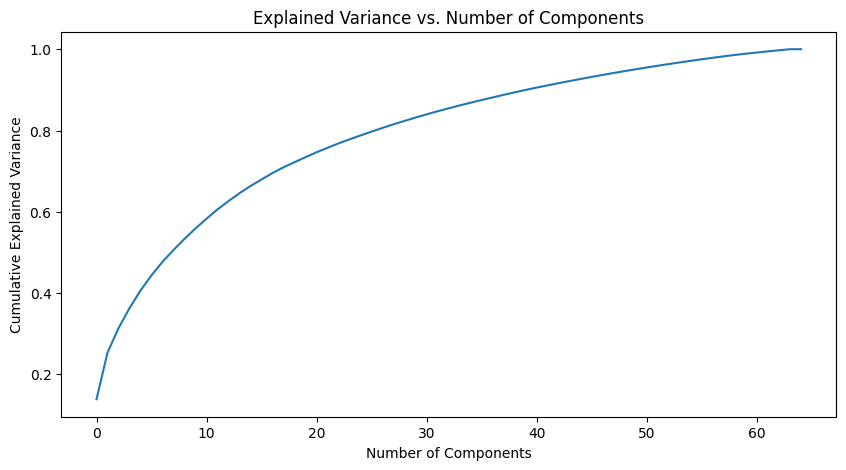

In [ ]:
# Plot explained variance vs number of components
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

* `pca.explained_variance_ratio_`: This attribute of the fitted PCA object contains the percentage of the total variance explained by each principal component. The values are sorted in descending order.

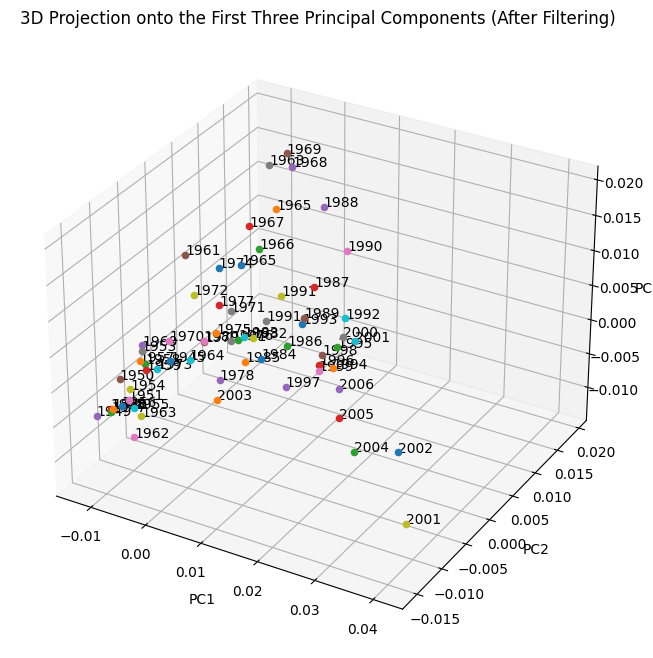

In [ ]:
# Plot 3D projection
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, fileid in enumerate(fileids):
   year = fileid.split('-')[0]
   ax.scatter(data_pca[i, 0], data_pca[i, 1], data_pca[i, 2])
   ax.text(data_pca[i, 0], data_pca[i, 1], data_pca[i, 2], year, size=10, zorder=1, color='k')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Projection onto the First Three Principal Components (After Filtering)')
plt.show()

* `fig.add_subplot(111, projection='3d')`: This adds a 3D subplot to the existing figure. The argument 111 indicates that the figure should be a 1x1 grid and the subplot should be the first (and only) in that grid. The projection='3d' parameter specifies that the subplot should be a 3D plot.
* `ax`: This is an Axes3D object which can be used for 3D plotting. You can use ax to add data points, labels, titles, etc., to the 3D plot.

In [ ]:
def analyze_addresses(fileids, addresses):
    for fileid, address in zip(fileids, addresses):
        year = fileid.split('-')[0]  # Extract year from filename
        president_name = fileid.split('-')[1].split('.')[0]  # Extract president's name from filename

        words = nltk.word_tokenize(address.lower())  # Lowercasing
        freq_dist = FreqDist(words)

        # Print information
        print(f"Year: {year}")
        print(f"President: {president_name}")
        print(f"Length: {len(words)}")
        print(f"First 20 words: {' '.join(words[:20])}")
        print(f"Last 20 words: {' '.join(words[-20:])}")
        print(f"20 Most common words: {[word[0] for word in freq_dist.most_common(20)]}")
        print(f"20 Least common words: {[word[0] for word in sorted(freq_dist.items(), key=lambda x: x[1])[:20]]}")
        print("-" * 50)

* The `zip` function pairs the ith element of fileids with the ith element of addresses for each iteration.
* `freq_dist.items()`: This converts the frequency distribution dictionary into a list of (word, frequency) tuples.
* `sorted(freq_dist.items(), key=lambda x: x[1])`: This sorts the list of (word, frequency) tuples based on the frequency value (x[1]) in ascending order, meaning the least frequent words will appear first.
* `[:20]`: This slices the sorted list to get the first 20 items, which correspond to the 20 least frequent words.
* `[word[0] for word in ...]`: This is a list comprehension that extracts the word (word[0]) from each (word, frequency) tuple in the sorted list.

In [ ]:
analyze_addresses(fileids, addresses)

Year: 1945
President: Truman
Length: 2108
First 20 words: president harry s. truman 's address before a joint session of the congress april 16 , 1945 mr. speaker ,
Last 20 words: people ? '' i ask only to be a good and faithful servant of my lord and my people .
20 Most common words: ['the', '.', ',', 'of', 'to', 'and', 'we', 'a', 'in', 'our', 'not', 'that', 'with', 'for', 'be', 'world', 'have', 'must', 'peace', 'is']
20 Least common words: ['harry', 's.', 'truman', 'address', 'joint', 'session', 'april', '16', '1945', 'speaker', 'stand', 'colleagues', 'yesterday', 'laid', 'mortal', 'like', 'inadequate', 'eloquent', 'tribute', 'reverent']
--------------------------------------------------
Year: 1946
President: Truman
Length: 29920
First 20 words: president harry s. truman 's message to the congress on the state of the union and on the budget for
Last 20 words: , then i say that our strength and our knowledge and our understanding will be equal to those tasks .
20 Most common words: ['t

In [ ]:
def top_terms_for_component_and_power(pca, component_num, vocab, n_terms=20):
    """
    Returns the top n_terms terms for a given PCA component and
    the proportion of the total power of the component represented by these terms.
    """
    # Extract the loadings for the specified component.
    loadings = pca.components_[component_num]

    # Get the squared loadings
    squared_loadings = loadings**2

    # Get the indices of the sorted (by magnitude) squared loadings.
    sorted_idx = np.argsort(squared_loadings)[::-1]

    # Get the total power of the component (sum of squared loadings)
    total_power = np.sum(squared_loadings)

    # Get the power represented by the top n_terms
    top_power = np.sum(squared_loadings[sorted_idx[:n_terms]])

    # Return the top terms for this component and the proportion of power
    return [vocab[i] for i in sorted_idx[:n_terms]], top_power / total_power

In [ ]:
for i in range(3):
  terms, power = top_terms_for_component_and_power(pca, i, vocab)
  print(f"Top terms for component {i+1}:")
  print(", ".join(terms))
  print(f"Proportion of power represented by top {len(terms)} terms: {power:.4f}")
  print("-" * 50)

Top terms for component 1:
sosa, few, blackmail, diversion, vested, illnesses, face, 10,000, nominee, redress, teaching, schedule, mourning, closer, maintained, undermine, sends, north, governed, waking
Proportion of power represented by top 20 terms: 0.8083
--------------------------------------------------
Top terms for component 2:
land., mourning, vested, redress, few, sosa, blackmail, consist, millions, diversion, parenting, illnesses, 10,000, jobs, migration, undermine, nonexistent, sends, shifting, refuge
Proportion of power represented by top 20 terms: 0.6038
--------------------------------------------------
Top terms for component 3:
diversion, mourning, teaching, millions, closer, redress, parenting, nominee, zones, vested, shifting, liberate, bogus, land., minutes, features, streams, valuable, 367.5, metropolitan
Proportion of power represented by top 20 terms: 0.7139
--------------------------------------------------


* The function `top_terms_for_component` is defined that will extract the top terms (by magnitude) for a given component.
* The function sorts the loadings of the specified PCA component in descending order of magnitude. It returns the terms associated with the top `n_terms` loadings.
* After performing PCA (in the main execution of your code), this function is called for each of the first three components, and the top terms are printed.
* This will provide a clearer interpretation of what each of the principal components represents in terms of the terms in the State of the Union addresses.

* Using TF-IDF can provide a more informative representation of the documents, especially when you're dealing with a large collection. It helps diminish the weight of terms that occur very frequently in the dataset and increases the weight of terms that occur rarely.

* term frequency (TF): the number of times a term appears in a document.
* inverse document frequency (IDF): diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.
* Multiply the TF by IDF for each term in each document.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
def transform_to_tfidf(tdm, vocab):
    tdm_array = np.array([tdm[word] for word in vocab])
    tdm_array_T = tdm_array.T

    transformer = TfidfTransformer()
    tfidf_matrix = transformer.fit_transform(tdm_array_T)

    return tfidf_matrix.toarray()

In [ ]:
# Filtering out the selected words from the vocabulary
vocab = [word for word in vocab if word not in once_occurrence_words and word not in top_words]

In [ ]:
tfidf_matrix = transform_to_tfidf(tdm, vocab)

In [ ]:
# Perform PCA on the tfidf_matrix
pca = PCA()
data_pca = pca.fit_transform(tfidf_matrix)

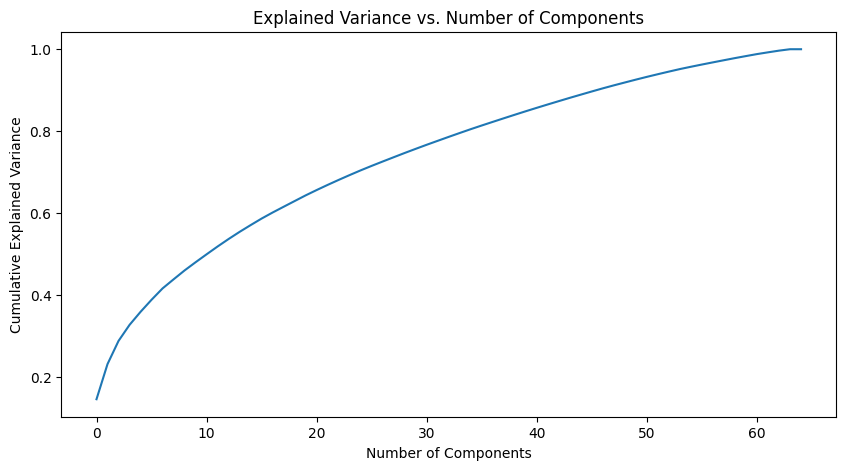

In [ ]:
# Plot explained variance vs number of components
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

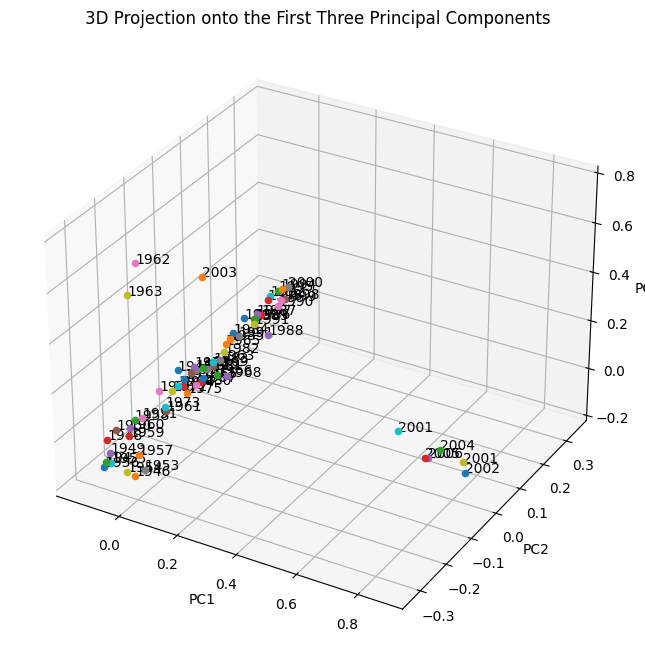

In [ ]:
# Plot 3D projection
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, fileid in enumerate(fileids):
  year = fileid.split('-')[0]
  ax.scatter(data_pca[i, 0], data_pca[i, 1], data_pca[i, 2])
  ax.text(data_pca[i, 0], data_pca[i, 1], data_pca[i, 2], year, size=10, zorder=1, color='k')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Projection onto the First Three Principal Components')
plt.show()

In [ ]:
def top_terms_for_component_and_power_tf_idf(pca, component_num, vocab, n_terms=20):
    """
    Returns the top n_terms terms for a given PCA component and
    the proportion of the total power of the component represented by these terms.
    """
    # Extract the loadings for the specified component.
    loadings = pca.components_[component_num]

    # Get the squared loadings
    squared_loadings = loadings**2

    # Get the indices of the sorted (by magnitude) squared loadings.
    sorted_idx = np.argsort(squared_loadings)[::-1]

    # Get the total power of the component (sum of squared loadings)
    total_power = np.sum(squared_loadings)

    # Get the power represented by the top n_terms
    top_power = np.sum(squared_loadings[sorted_idx[:n_terms]])

    # Fetch the top terms for this component and append a sign based on the loading coefficient
    top_terms = []
    for idx in sorted_idx[:n_terms]:
        term = vocab[idx]
        sign = "+" if loadings[idx] > 0 else "-"
        top_terms.append(f"{term} ({sign})")

    # Return the top terms with their sign for this component and the proportion of power
    return top_terms, top_power / total_power

In [ ]:
for i in range(3):
  terms, power = top_terms_for_component_and_power(pca, i, vocab)
  print(f"Top terms for component {i+1}:")
  print(", ".join(terms))
  print(f"Proportion of power represented by top {len(terms)} terms: {power:.4f}")
  print("-" * 50)

Top terms for component 1:
( (+), ) (+), applause (+), that (-), for (-), i (-), this (-), be (-), it (-), as (-), which (-), terrorists (+), but (-), can (-), have (-), terror (+), iraq (+), is (-), all (-), afghanistan (+)
Proportion of power represented by top 20 terms: 0.8643
--------------------------------------------------
Top terms for component 2:
you (+), i (+), 's (+), - (-), which (-), that (+), be (-), america (+), -- (+), n't (+), tonight (+), is (-), 're (+), do (+), 've (+), shall (-), it (+), let (+), who (+), nations (-)
Proportion of power represented by top 20 terms: 0.4309
--------------------------------------------------
Top terms for component 3:
- (+), -- (-), that (-), ... (+), ) (-), ( (-), be (-), will (-), i (-), government (-), this (-), as (-), not (+), have (-), saddam (+), applause (-), hussein (+), congress (-), are (-), which (-)
Proportion of power represented by top 20 terms: 0.7791
--------------------------------------------------


In [ ]:
from sklearn.decomposition import NMF

Non-negative Matrix Factorization (NMF) is a matrix factorization technique that approximates a given matrix as the product of two lower-rank non-negative matrices. Unlike Principal Component Analysis (PCA), which allows for negative elements in its components, NMF ensures that all elements in the factorized matrices are non-negative, thereby providing additive, parts-based representations of the original data.